In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
import pandas as pd
from matplotlib import pyplot as plt

In [18]:
!pip install matplotlib

In [19]:
!pip install sklearn

ERROR: Could not find a version that satisfies the requirement sklearn (from versions: none)
ERROR: No matching distribution found for sklearn


In [8]:
df2=pd.read_csv('/kaggle/input/csv-file/nasdaq100.csv',sep=';')

In [9]:
df2.head()

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700


In [10]:
df2=df2.drop(columns=['Date'])
df2.head()

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700


In [11]:
x=df2.drop(columns=['Ending (USD)'])
x.head()

,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300


In [12]:
y=df2.drop(columns=['Starting (USD)'])
y.head()

,Ending (USD)
0,16500
1,16100
2,15300
3,16200
4,15700


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
reg = LinearRegression()

In [15]:
x.mean()

Starting (USD)    16195.833333
dtype: float64

In [16]:
y.mean()

Ending (USD)    15975.0
dtype: float64

In [17]:
reg.fit(x,y)

LinearRegression()

In [18]:
m = reg.coef_
m

array([[0.65258293]])

In [19]:
c = reg.intercept_
c

array([5405.87555702])

In [20]:
m * 16700 + c

array([[16304.0105628]])

Text(0.5, 1.0, 'NASDAQ100 Stock Prices')

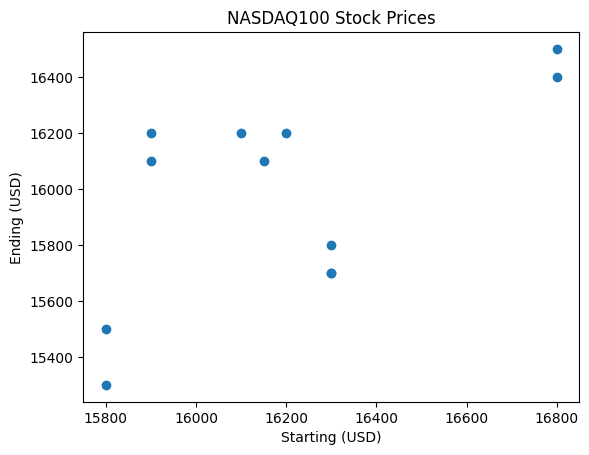

In [21]:
plt.scatter(df2['Starting (USD)'] , df2['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ100 Stock Prices')

Text(0.5, 1.0, 'NASDAQ100 Stock Prices')

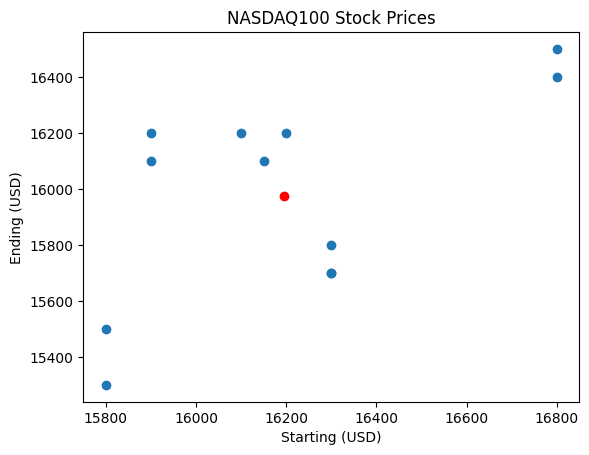

In [22]:
plt.scatter(x.mean() , y.mean(),color='red')
plt.scatter(df2['Starting (USD)'] , df2['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ100 Stock Prices')

In [23]:
reg.predict([[16600]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16238.75226935]])

In [24]:
df2['predicted_y']=reg.predict(x)
df2.head()

,Starting (USD),Ending (USD),predicted_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389


Text(0.5, 1.0, 'NASDAQ100 Stock Prices')

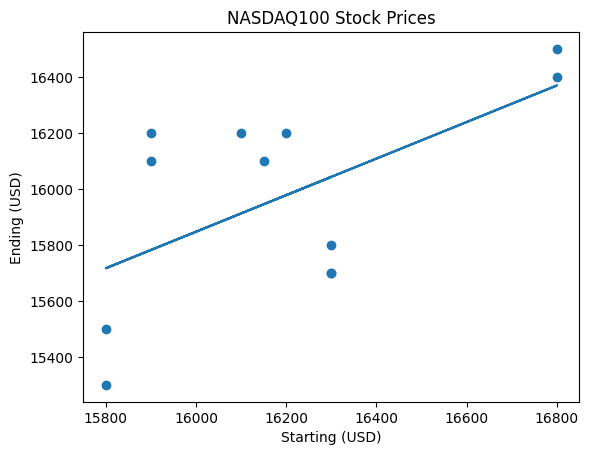

In [25]:
plt.plot(x,reg.predict(x))
plt.scatter(df2['Starting (USD)'] , df2['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ100 Stock Prices')

In [27]:
reg.predict([[16300]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16042.97738901]])

In [28]:
reg.score(x,y)

0.3577804940272571

In [29]:
from sklearn.metrics import r2_score
r2_score(y,reg.predict(x))

0.3577804940272571